# 🚖 Uber Supply-Demand Gap Analysis
**Tools Used**: Python, SQL (Oracle), Excel

This project explores Uber ride request data to uncover key factors behind the supply-demand gap. We analyze patterns using Python for data cleaning and visualization, SQL for business insights, and Excel for dashboarding.

## 📌 Problem Statement
Uber is facing a significant mismatch between supply and demand during certain times and pickup points. Using historical ride request data, our goal is to:
- Identify when and where the demand is not met
- Understand cancellation and unavailability patterns
- Suggest data-backed improvements

## 🧾 Dataset Overview
- **File Name**: `Uber Request Data.csv`
- **Columns**: Request ID, Pickup Point, Driver ID, Status, Request Timestamp, Drop Timestamp
- **Duration**: 11 July – 15 July 2016
- **Records**: 6745 rows (before cleaning)

## 🧹 Data Cleaning (Python)

- Converted timestamp strings to datetime using `pd.to_datetime()`
- Extracted `hour`, `day`, and derived `time slot`
- Handled missing values in timestamps and status
- Removed duplicates
- Exported cleaned dataset to `Uber_Cleaned_Data.csv` and `.xlsx`

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load CSV file
df = pd.read_csv("Uber Request Data.csv")

# Step 3: Preview the data
print("First 5 rows:")
print(df.head())

First 5 rows:
   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  2016-07-11 11:51   
1         867      Airport        1.0  Trip Completed  2016-07-11 17:57   
2        1807         City        1.0  Trip Completed  2016-07-12 09:17   
3        2532      Airport        1.0  Trip Completed  2016-07-12 21:08   
4        3112         City        1.0  Trip Completed  2016-07-13 08:33   

     Drop timestamp  
0  2016-07-11 13:00  
1  2016-07-11 18:47  
2  2016-07-12 09:58  
3  2016-07-12 22:03  
4  2016-07-13 09:25  


In [4]:
# Step 4: Dataset Info
print("\nDataset Info:")
print(df.info())

# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total duplicate rows:", duplicate_rows.sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None
Total duplicate rows: 0


In [5]:
# Step 5: Missing Values Check
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [6]:
# Drop duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Check parsing results
print("Missing request timestamps:", df['Request timestamp'].isna().sum())
print("Missing drop timestamps:", df['Drop timestamp'].isna().sum())
df = df[df['Request timestamp'].notna()]


Shape after removing duplicates: (6745, 6)
Missing request timestamps: 4071
Missing drop timestamps: 5595


In [7]:
# Extract hour and day
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.date

# Create time slot column
def get_time_slot(hour):
    if pd.isna(hour): return np.nan
    if 0 <= hour < 5:
        return "Late Night"
    elif 5 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time slot'] = df['Request hour'].apply(get_time_slot)

print("\nSample after cleaning:")
print(df.head())


Sample after cleaning:
   Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
9         267         City        2.0  Trip Completed 2016-11-07 06:46:00   

       Drop timestamp  Request hour Request day  Time slot  
0 2016-11-07 13:00:00            11  2016-11-07  Afternoon  
1 2016-11-07 18:47:00            17  2016-11-07    Evening  
2 2016-12-07 09:58:00             9  2016-12-07    Morning  
3 2016-12-07 22:03:00            21  2016-12-07      Night  
9 2016-11-07 07:25:00             6  2016-11-07    Morning  


## 📊 EDA using Python (Matplotlib & Seaborn)
### ✅ Univariate Analysis
- Countplot of trip status
- Pickup point frequency
- Requests by time slot

### ✅ Bivariate Analysis
- Status vs Time Slot
- Status vs Pickup Point
- Heatmap: Hour vs Status

C:\Users\mk199\AppData\Local\Temp\ipykernel_22980\2092941670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='Set2')


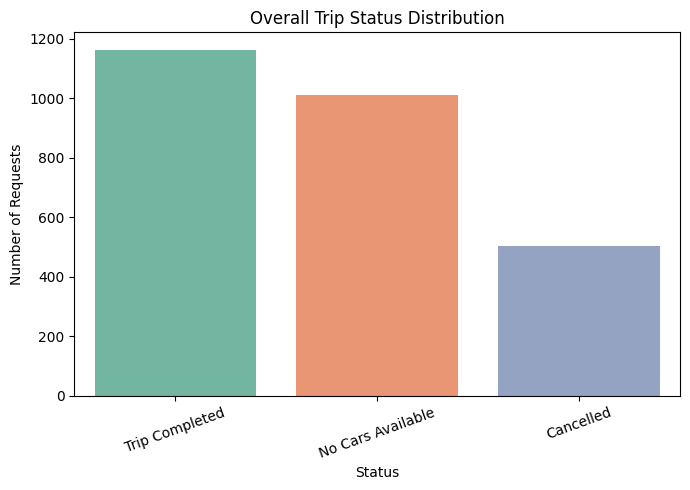

C:\Users\mk199\AppData\Local\Temp\ipykernel_22980\2092941670.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='Set1')


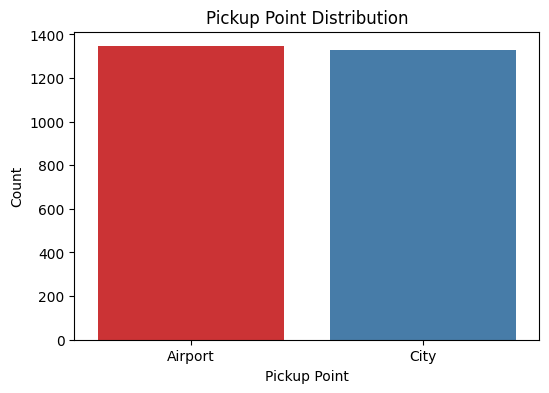

C:\Users\mk199\AppData\Local\Temp\ipykernel_22980\2092941670.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time slot', order=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'], palette='coolwarm')


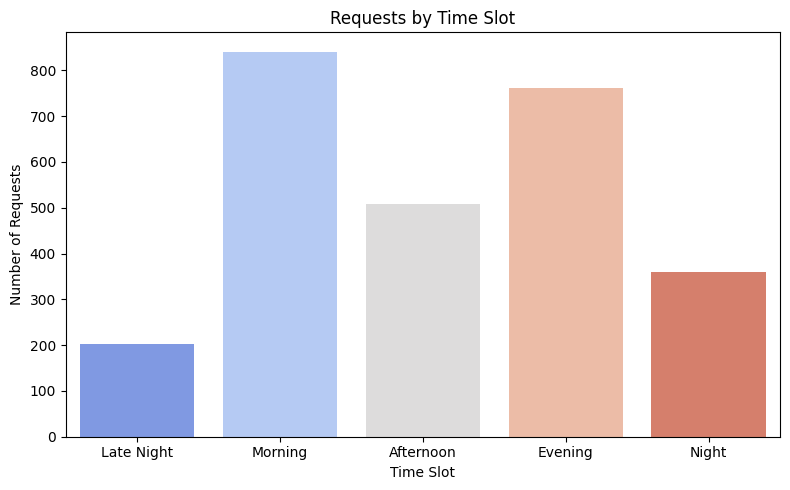

In [8]:
# Univariate Analysis
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='Set2')
plt.title("Overall Trip Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pickup point', palette='Set1')
plt.title("Pickup Point Distribution")
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time slot', order=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'], palette='coolwarm')
plt.title("Requests by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time slot', hue='Status', order=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'], palette='pastel')
plt.title("Trip Status by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='coolwarm')
plt.title("Trip Status by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

pivot = df.pivot_table(index='Request hour', columns='Status', values='Request id', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Request Status by Hour of the Day")
plt.ylabel("Hour")
plt.xlabel("Status")
plt.show()

In [ ]:
# Export cleaned data to Excel
df.to_excel("Uber_Cleaned_Data.xlsx", index=False)

## 📈 Excel Dashboard Highlights
- KPIs: Total Requests, Completion %, Cancellation %, No Cars %
- Pivot tables for Status vs Time Slot, Pickup Point
- Interactive slicers for Time Slot, Pickup Point, Status
- Line chart: Hourly demand

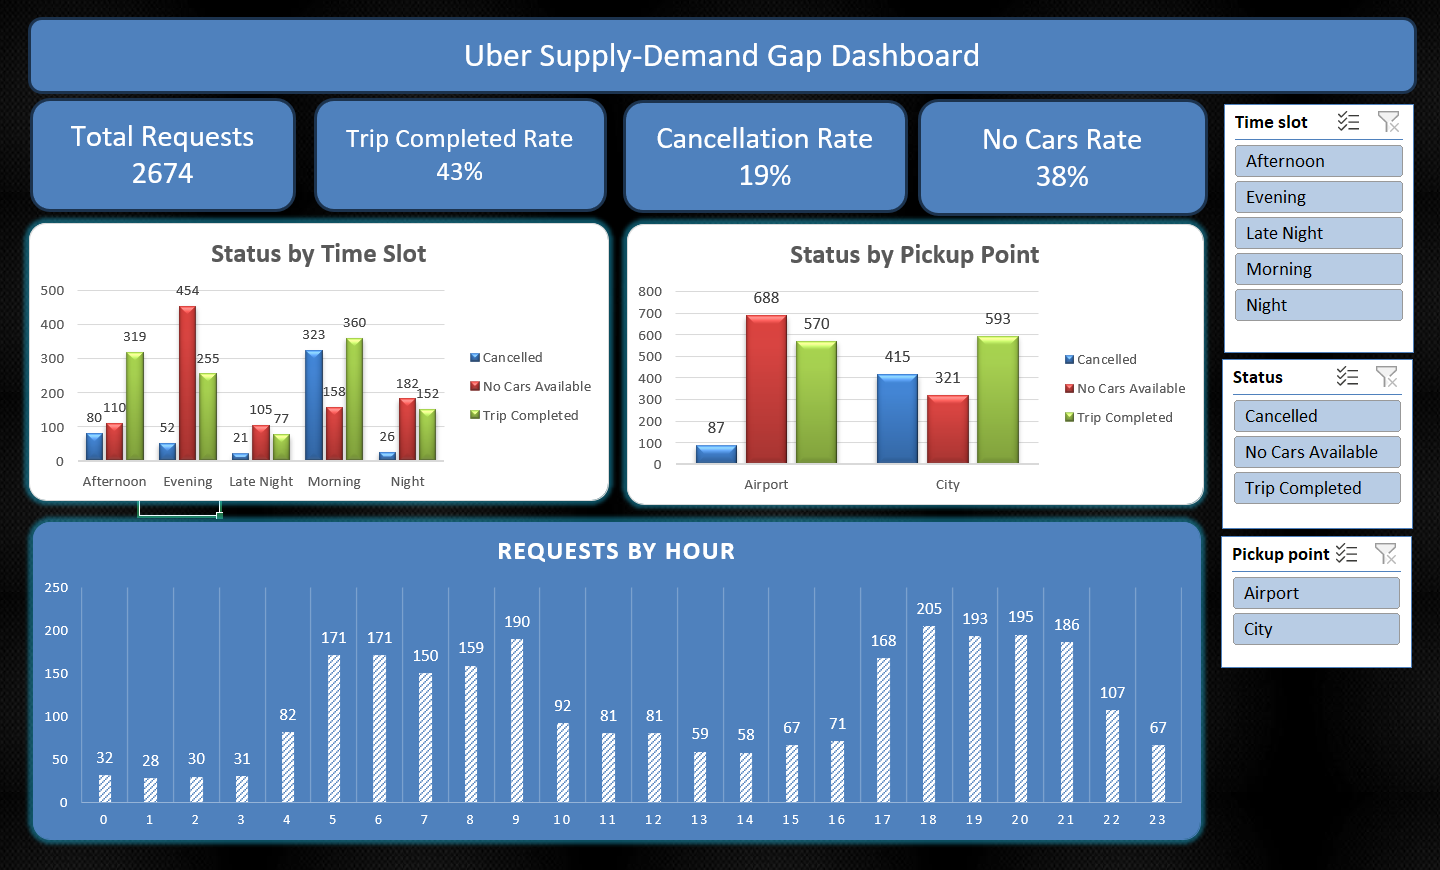

- Dashboard file: `Uber_Cleaned_Data_Dashboard.xlsx`

## 🗃️ SQL Insights (Oracle SQL Developer)
Ran 10 SQL queries on cleaned data:
- Status breakdown
- Status by Time Slot
- Status by Pickup Point
- Hourly demand pattern
- Top 3 hours with most cancellations
- Completion rate by time slot
- Pickup point with highest no-car cases


1️. Total number of ride requests

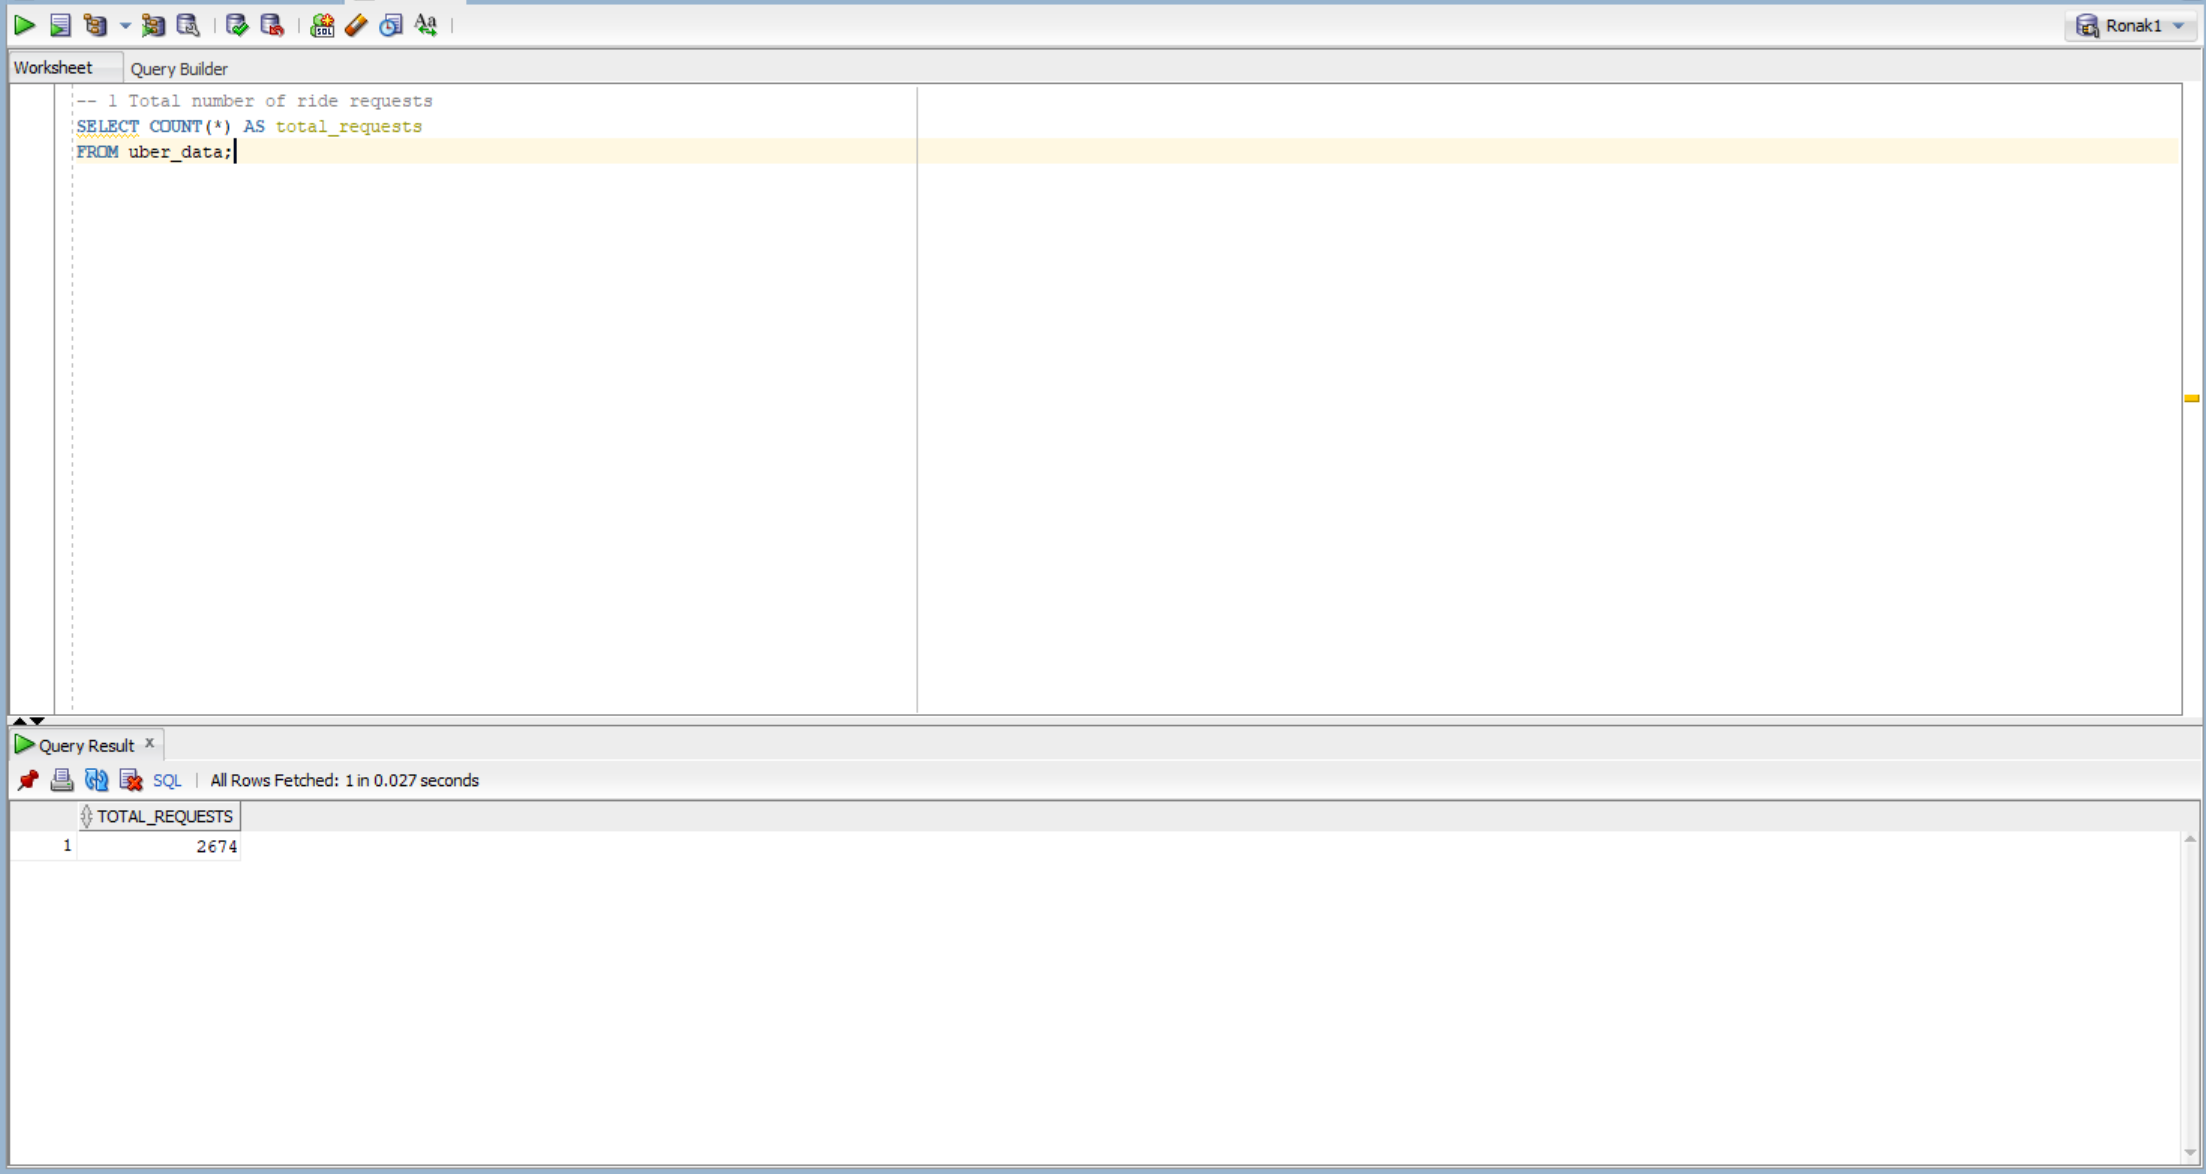 

2️. Total number of requests by trip status

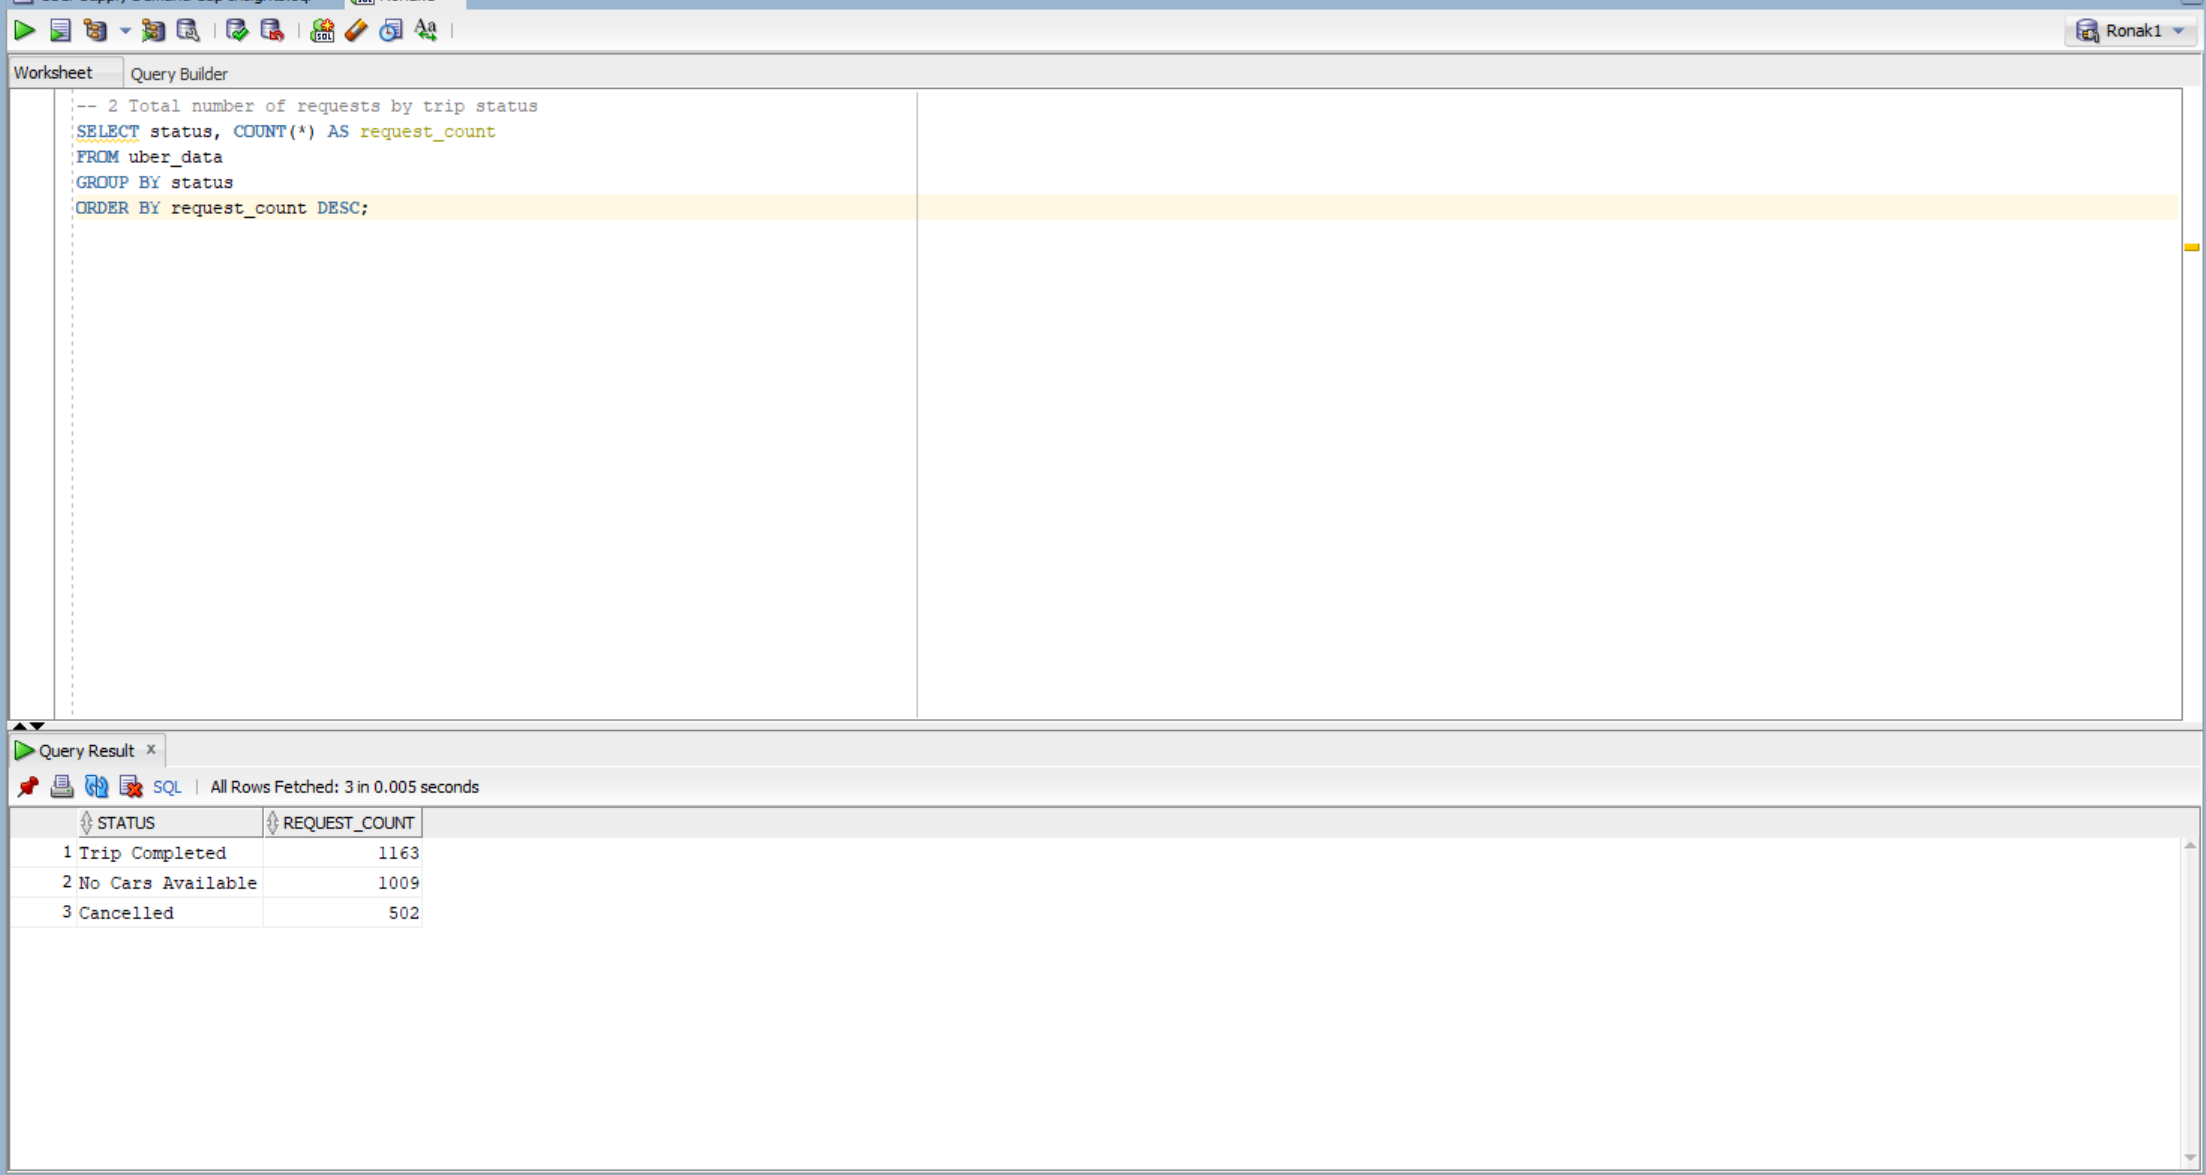 

3️. Breakdown of status by time slot (Morning, Night, etc.)

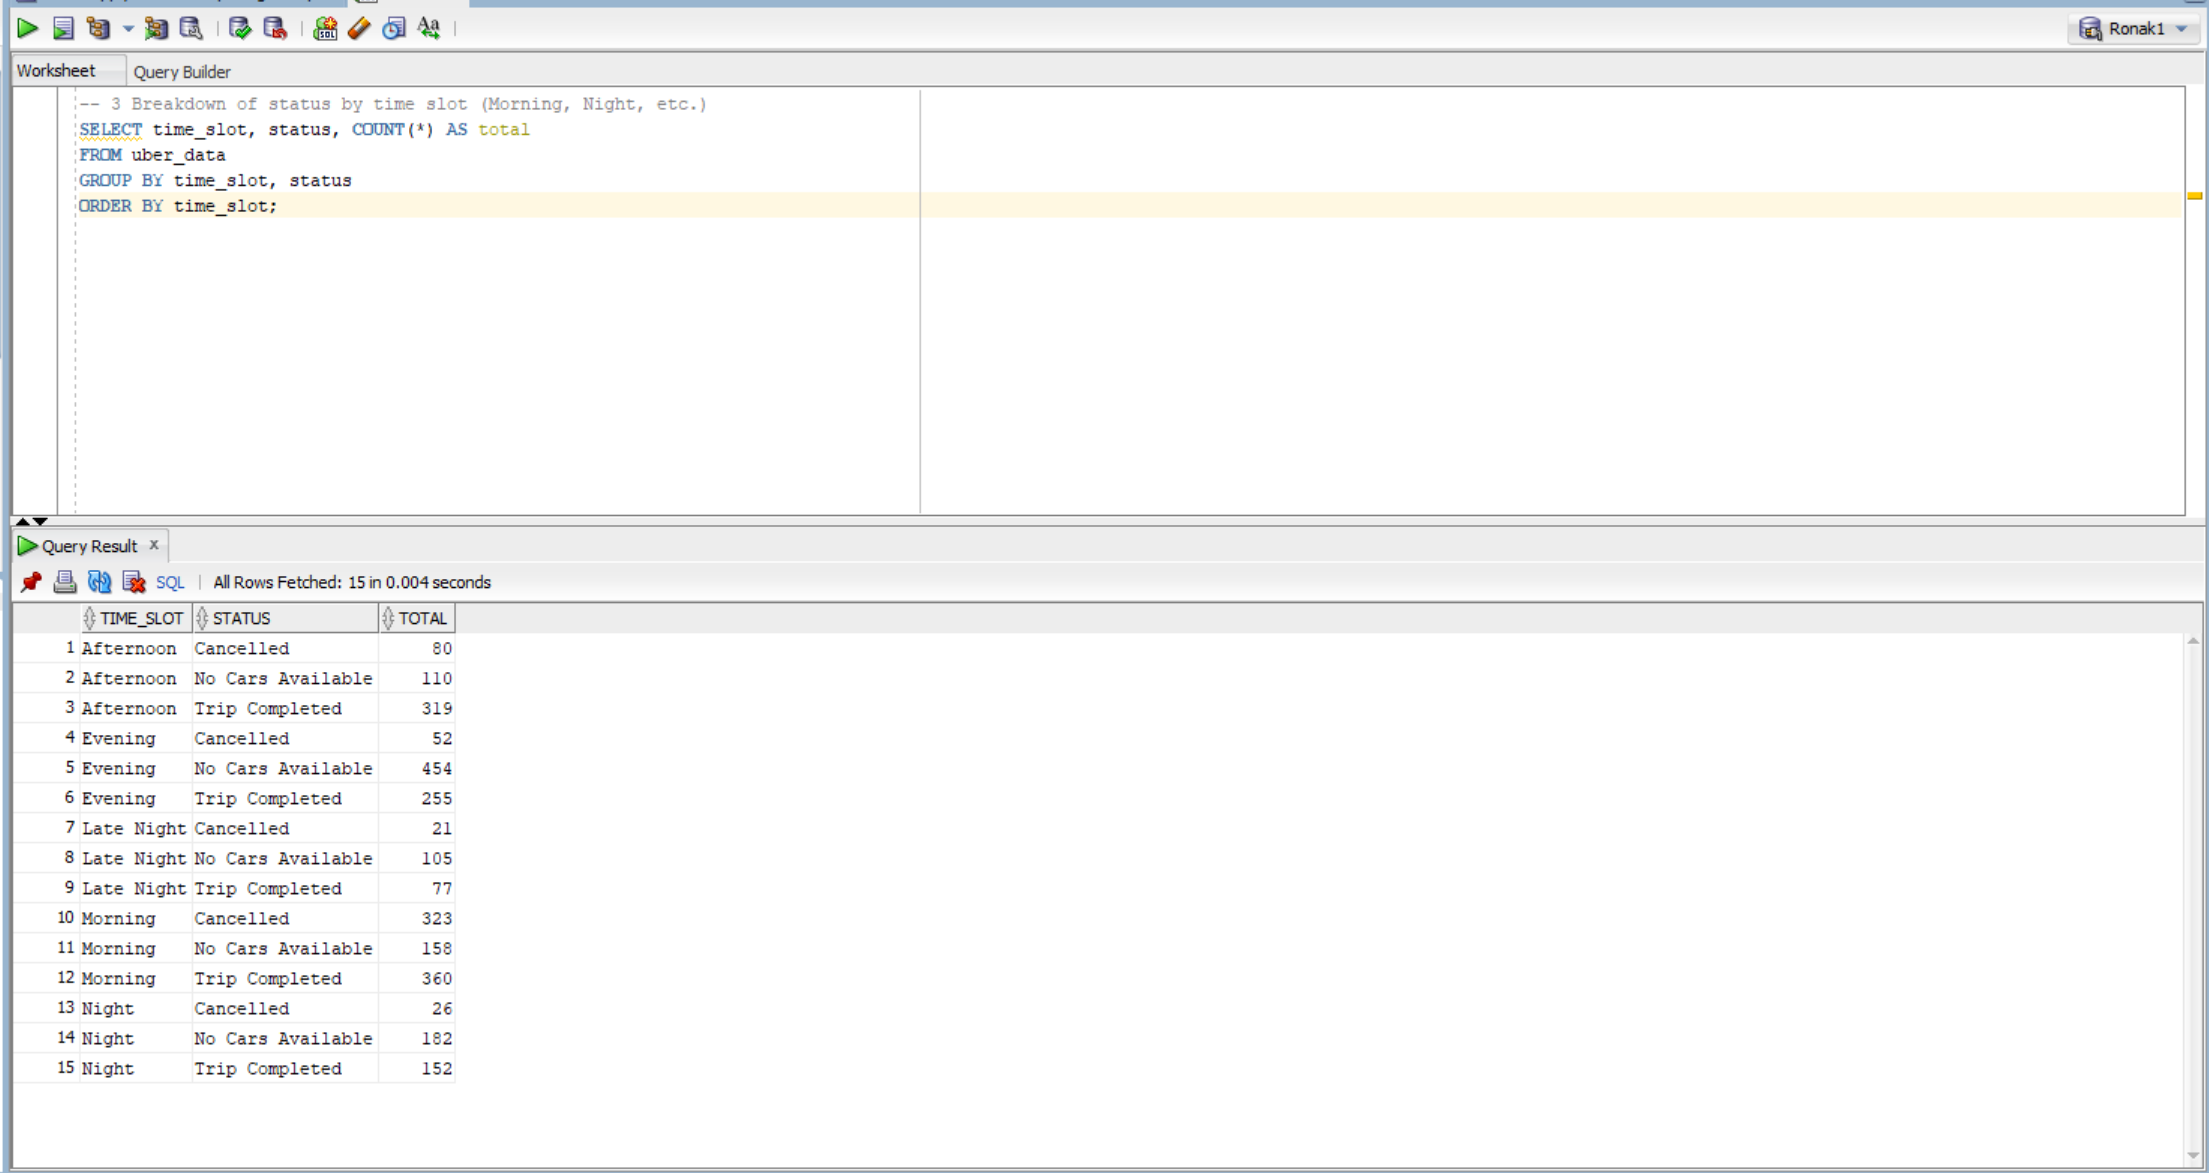 

4️. Compare trip status (Completed, Cancelled, No Cars) by pickup location

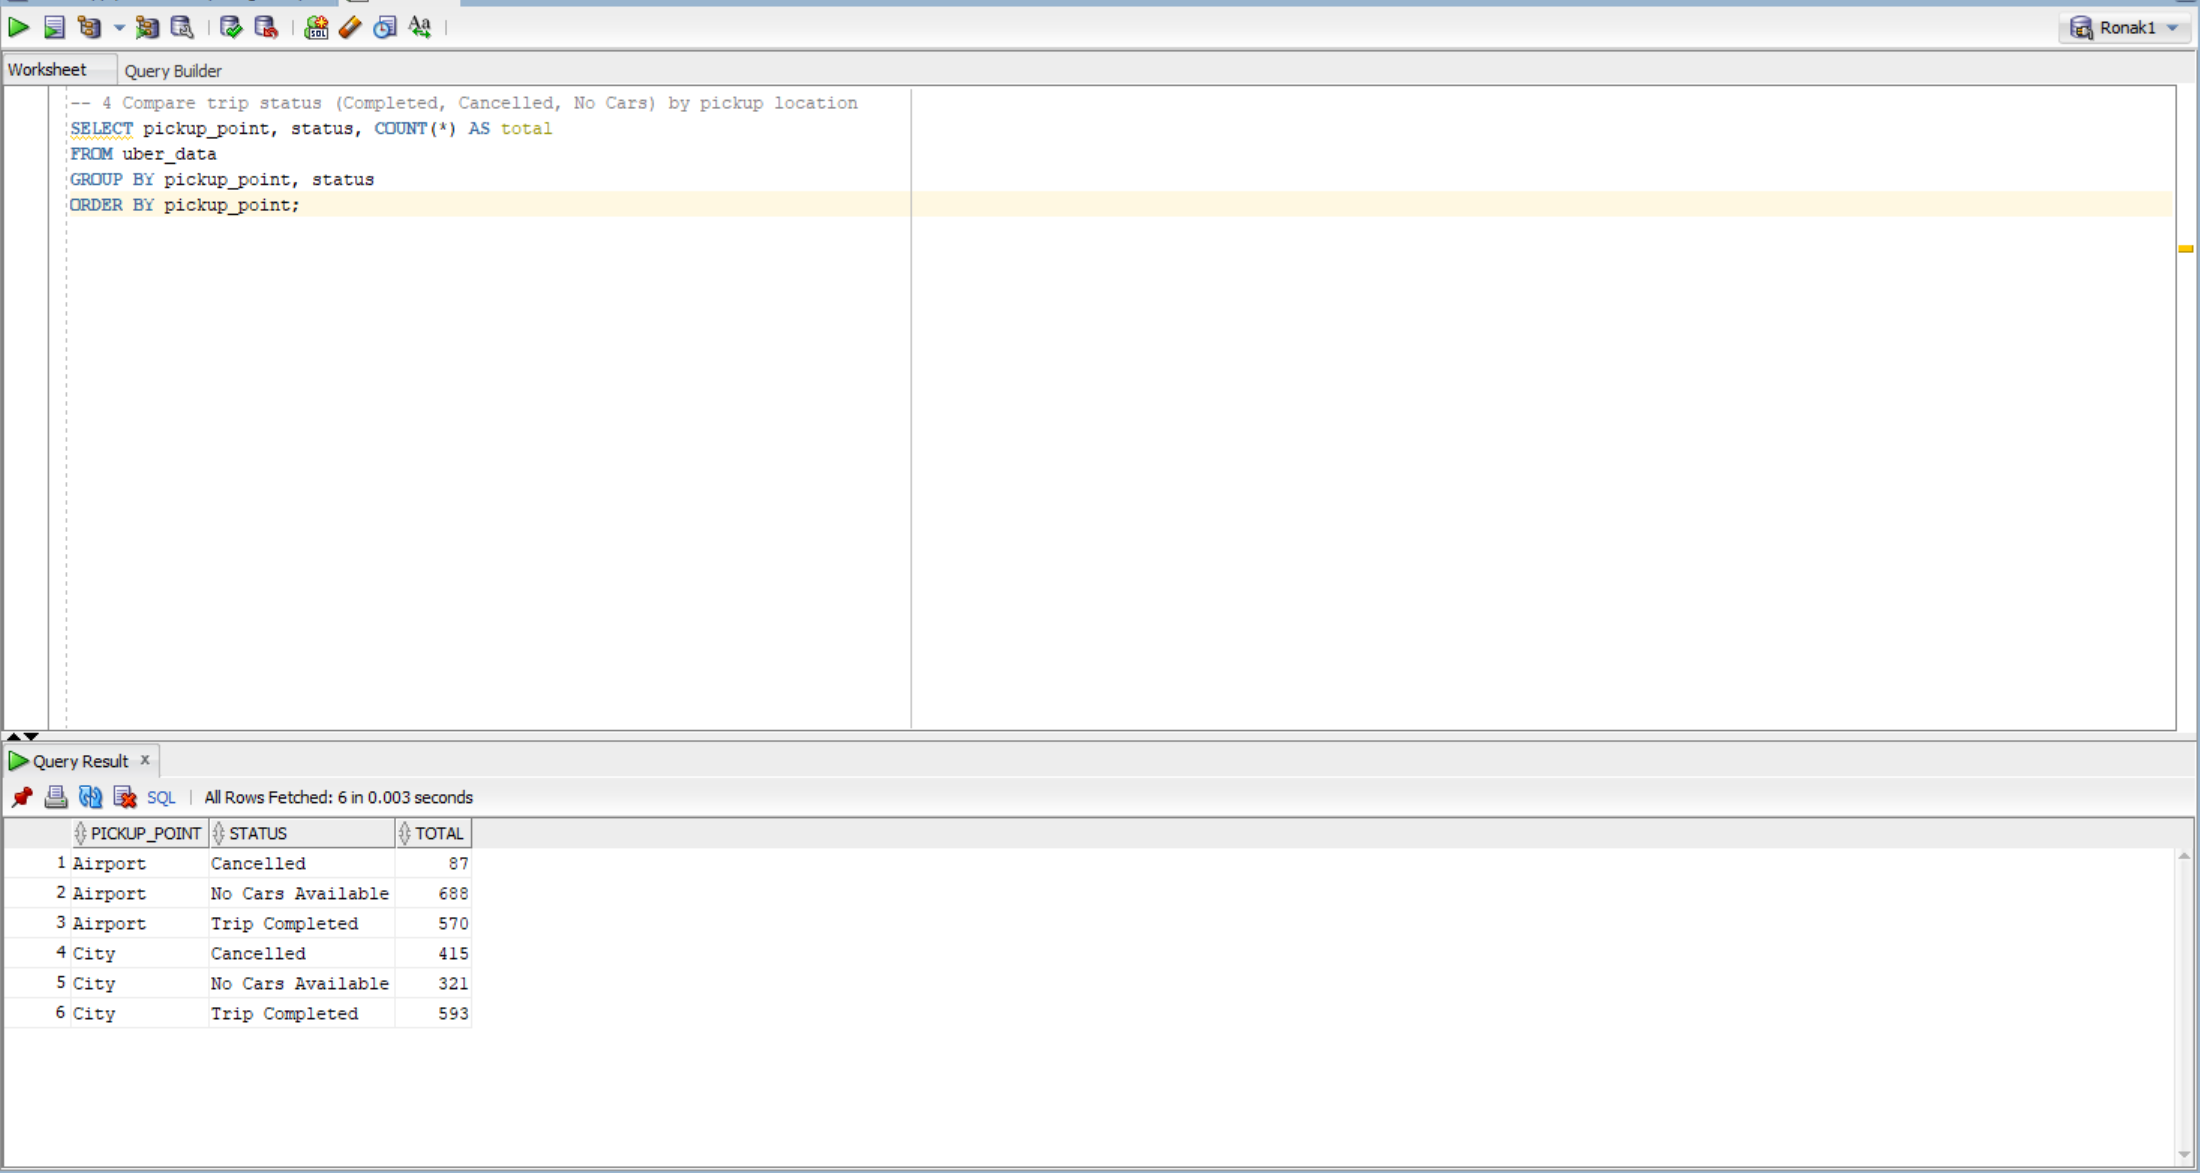 

5️. Distribution of ride requests by hour of the day

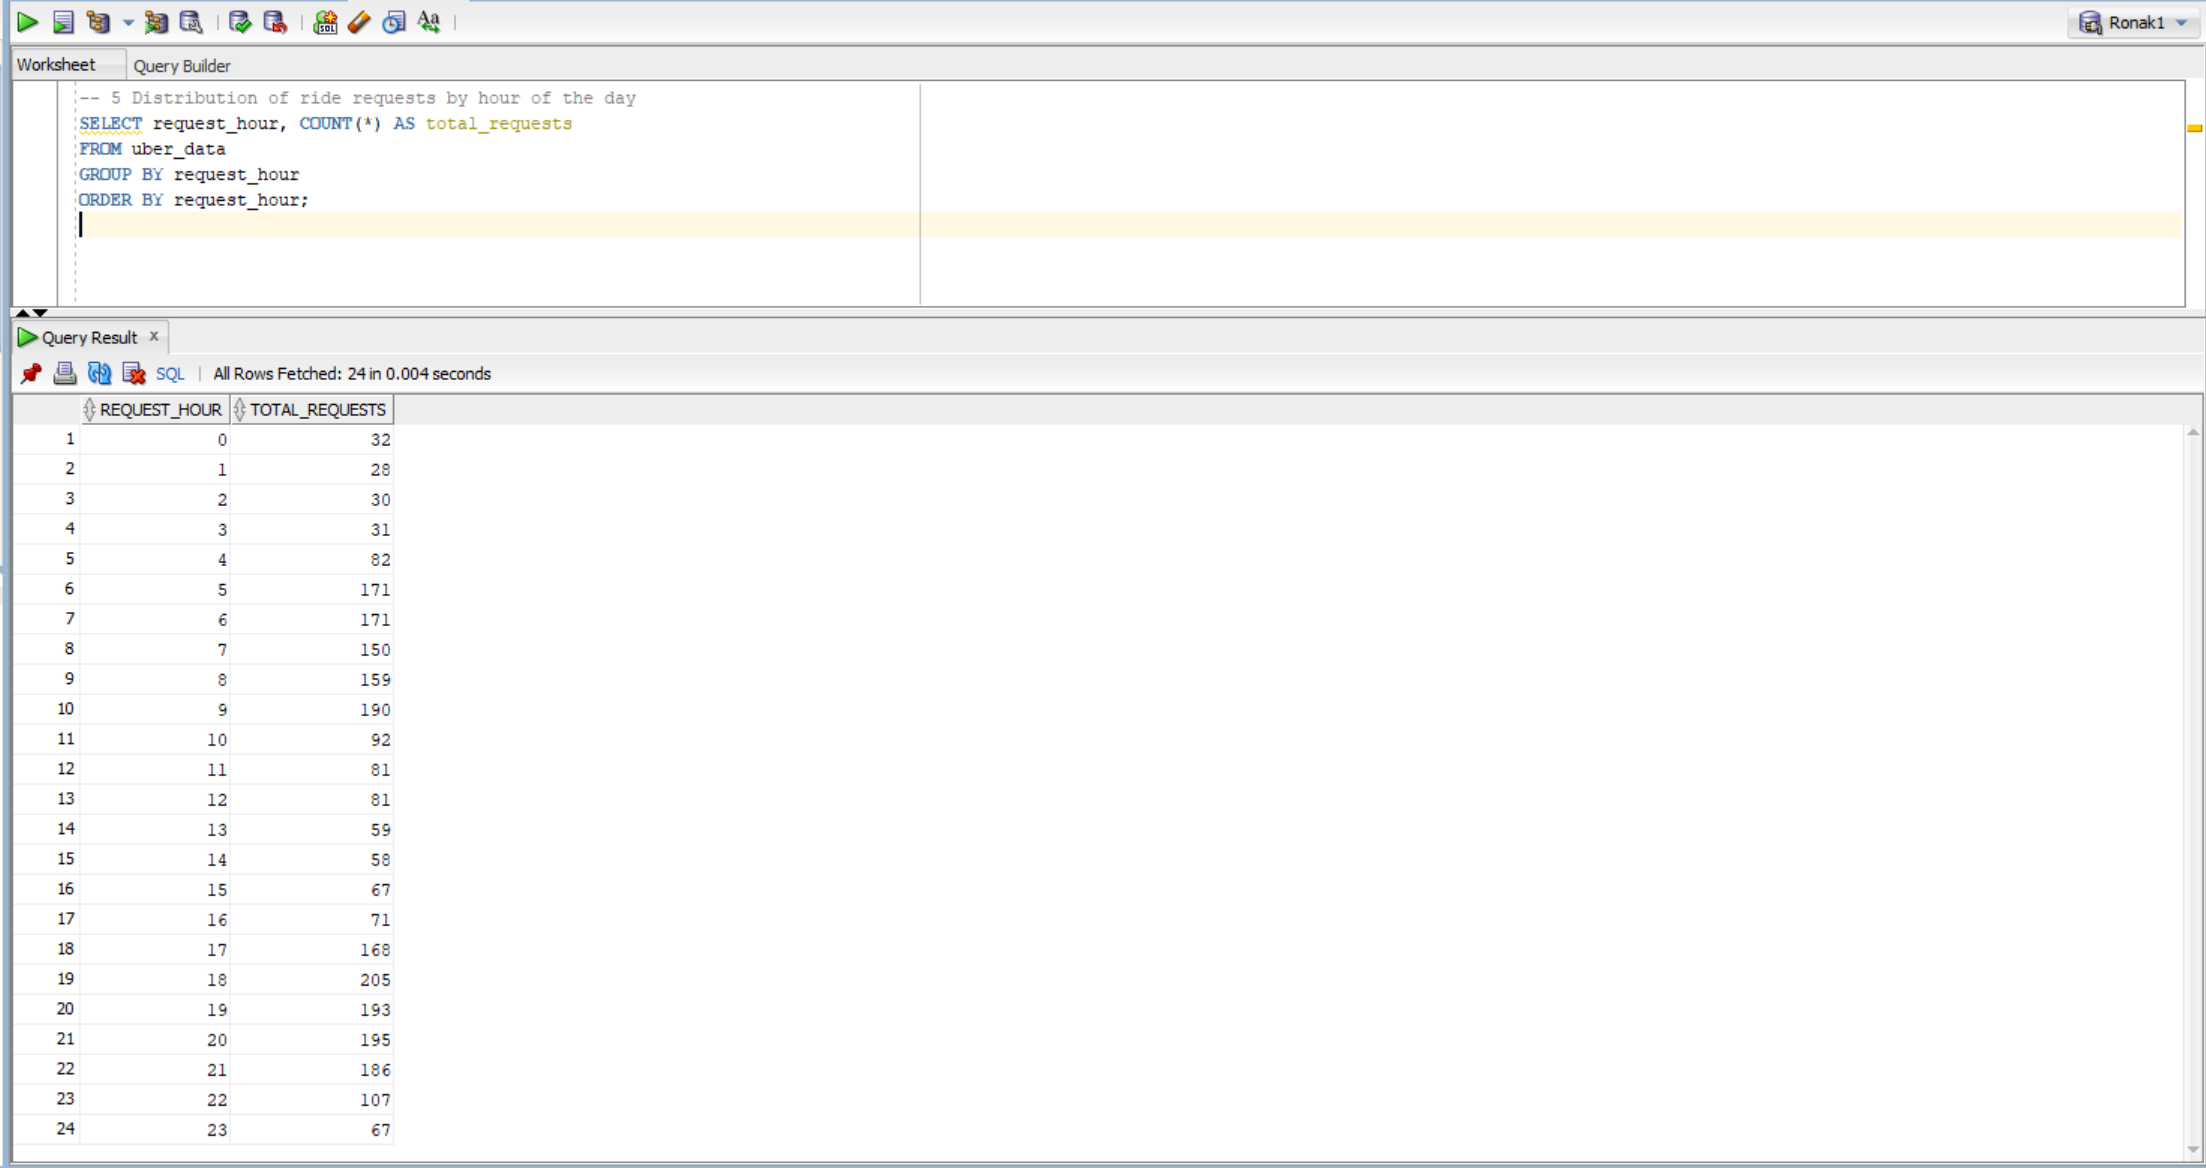 

6️. Identify time slots with the highest number of cancellations

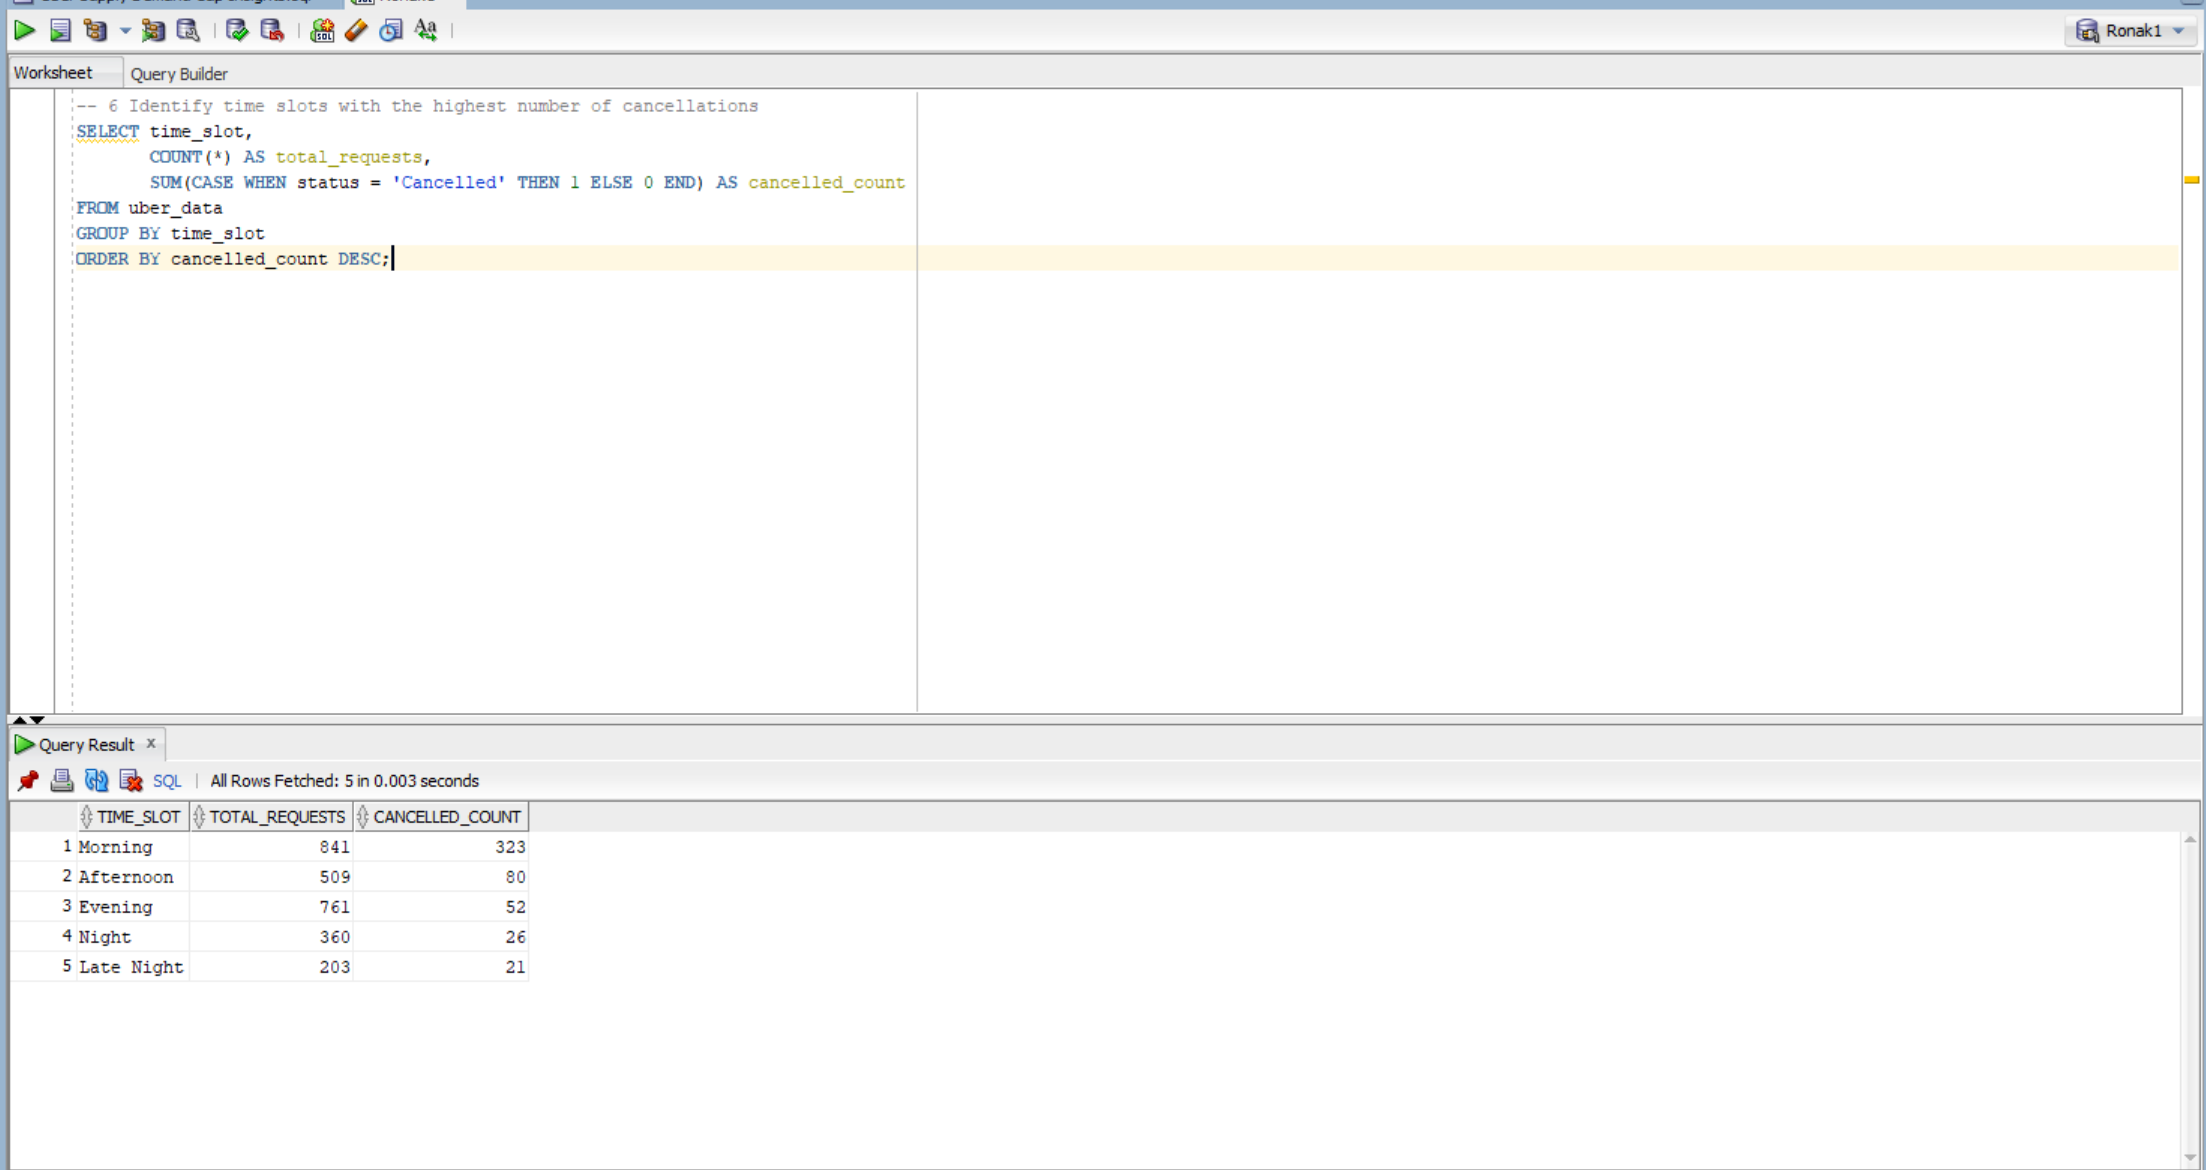 

7️. Identify pickup point with the highest number of 'No Cars Available'

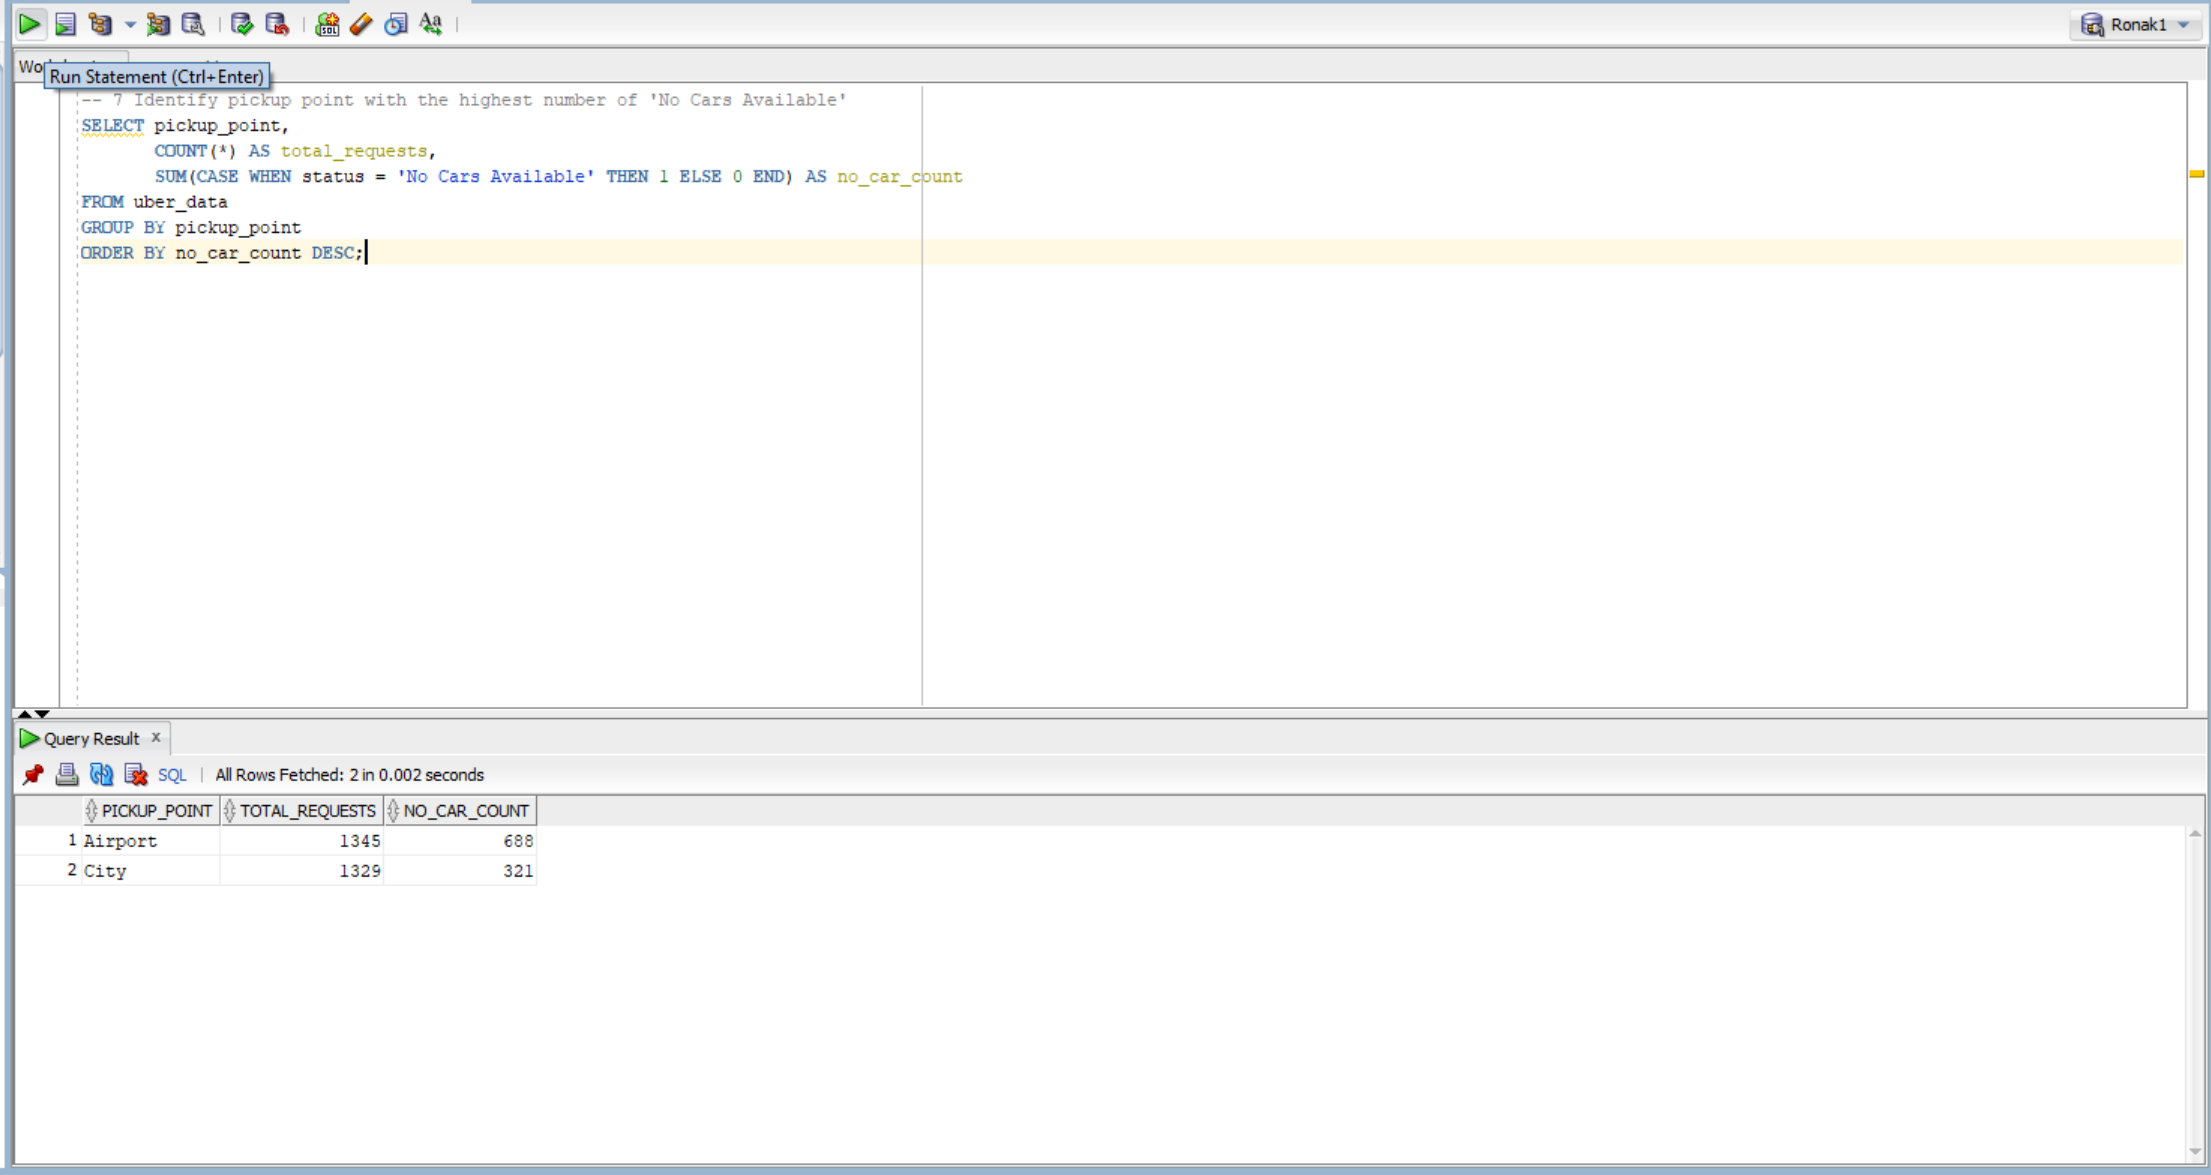 

8️. Overall completion rate of all ride requests

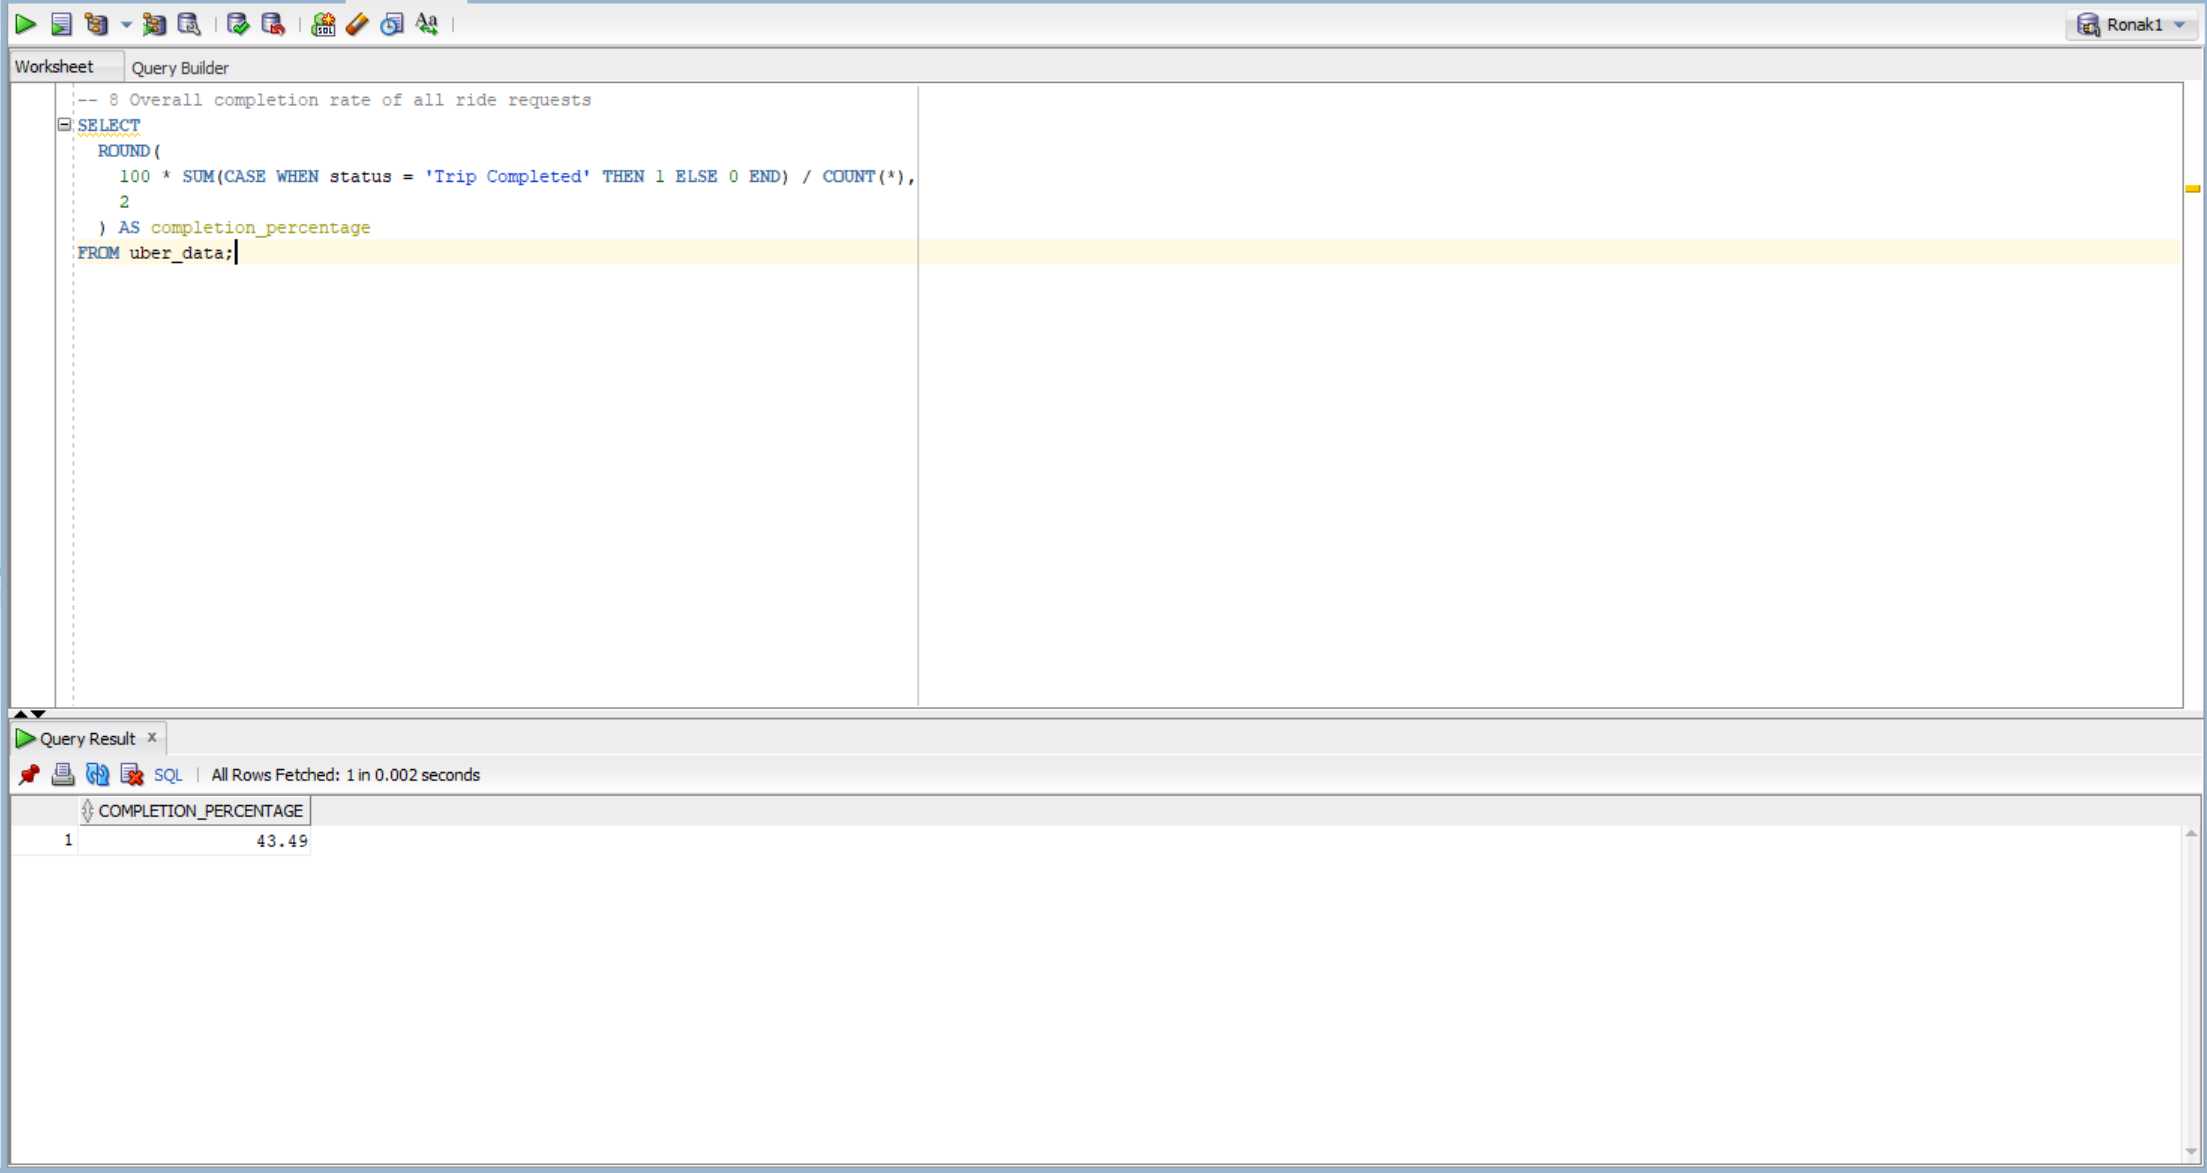 


9️. Completion rate by time slot

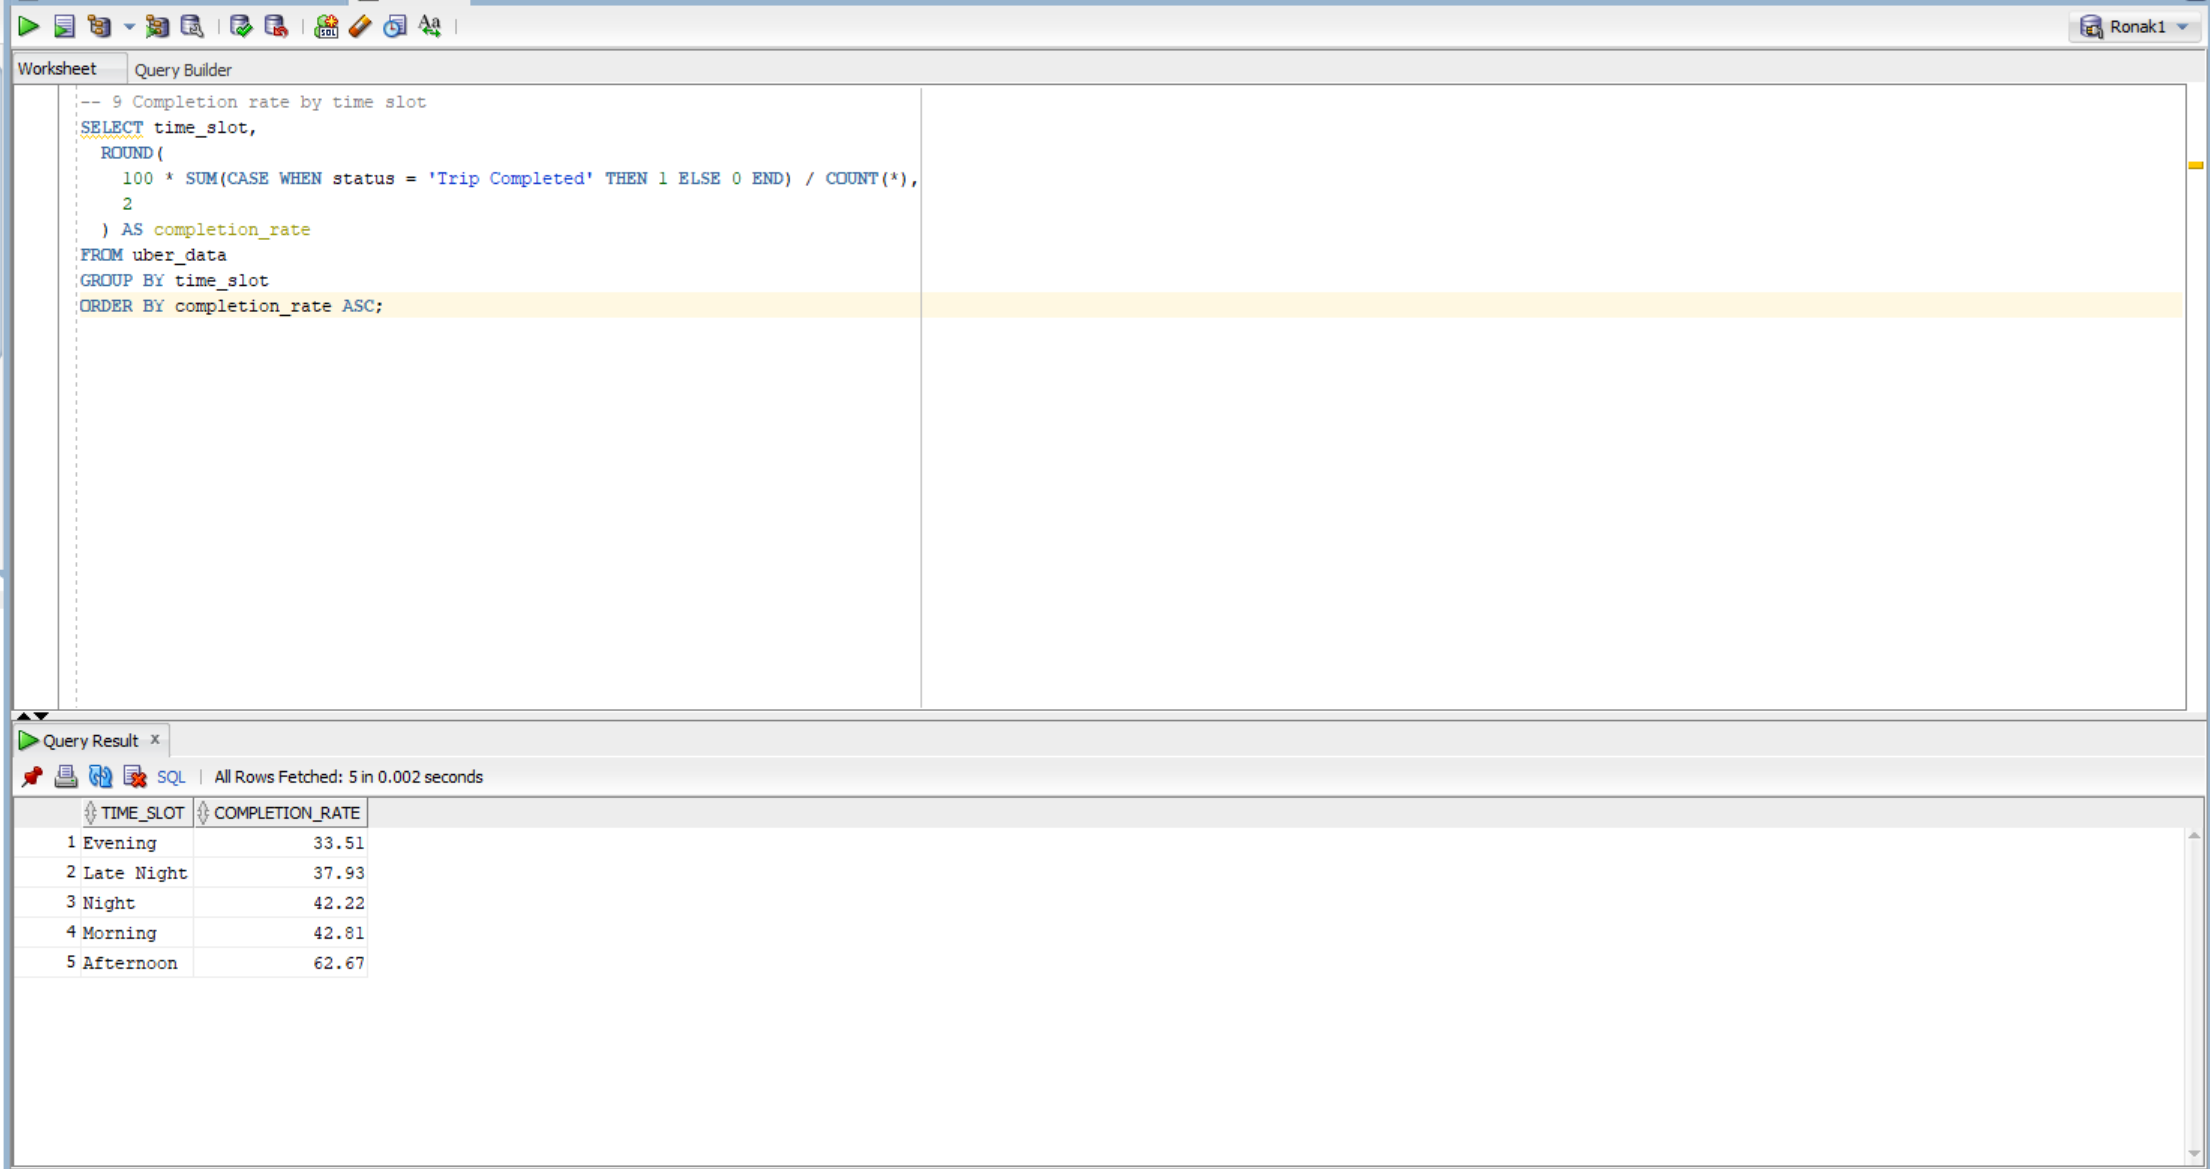

10. Top 3 hours of the day with the highest number of cancellations

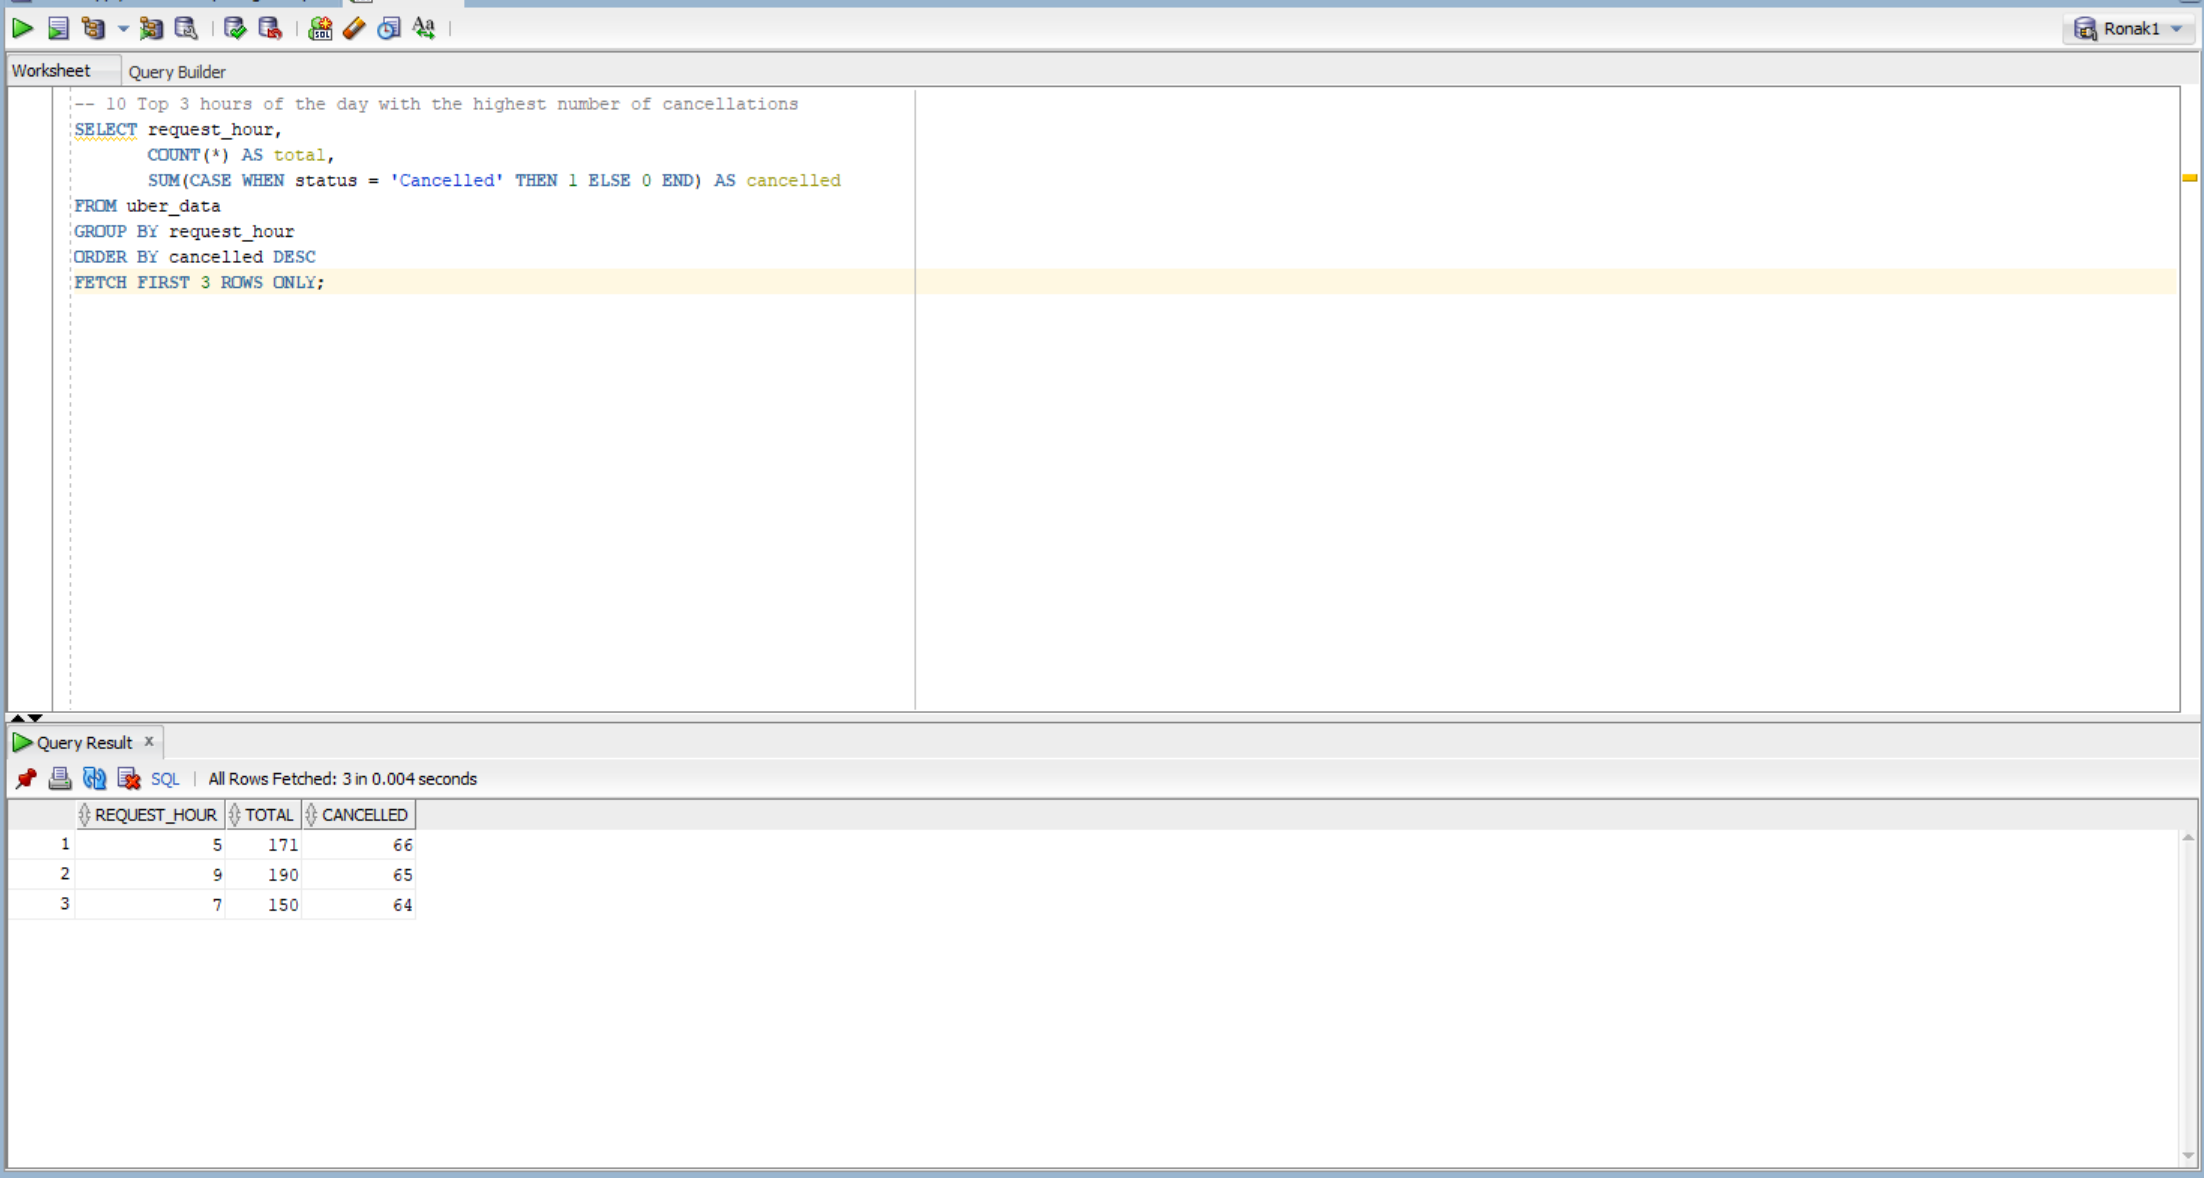




📁 SQL File: `Uber Supply Demand Gap Insights.sql`
📷 10 screenshots included in `/SQL` folder

## 📌 Key Insights
- ❌ Morning and Late Night show high cancellation & 'No Cars Available'
- 🛫 Airport pickup point has significantly more demand-supply issues
- ⏰ Peak hour demand: 5 AM to 10 AM
- ✅ Overall trip completion rate is ~41%
- 📉 Low completion during Night & Morning slots

## ✅ Conclusion
To reduce the supply-demand gap:
- Increase driver availability during Morning and Night
- Prioritize allocation at Airport
- Use demand heatmaps for dynamic scheduling
- Continue weekly data review via dashboard + SQL

## 🔗 Project Repository
[GitHub: Uber Supply-Demand Gap](https://github.com/ronak171990/Uber-Supply-Demand-Gap)